In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Model selection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor



import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [37]:
attrition = pd.read_csv(r"C:\Users\fmati\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# What factors make us to left a company?
## Can we predict this phenomenon?
### In this proyect I'm going to use the [IBM DATA](https://www.codecademy.com/pages/contribute-docs)
#### In this project perform the following
#### -Correlation analysis
#### -Random Forest
#### -Logistic regression
#### -F1 Score.
#### It's my first project, I hope you like it and I look forward to comments.



## Variables
**Attrition:** A categorical variable indicating whether the employee has left the company ("Yes" or "No"). This is often the target variable in employee turnover or attrition analysis.

**BusinessTravel:** Classifies how frequently the employee travels for business. Categories may include "Rarely," "Frequently," and "Non-Travel." Frequent travel could impact job satisfaction and turnover rates.

**DailyRate:** Represents the employee's daily wage. This data helps analyze financial aspects related to job satisfaction.

**Department:** A categorical variable indicating the employee's work area, such as "Sales," "R&D," or "HR." Differences across departments may affect the work environment and level of engagement.

**DistanceFromHome:** Measures the distance between the employee's home and their workplace, typically in kilometers or miles. Longer commutes may be associated with lower job satisfaction and higher turnover.

**Education:** The educational level attained by the employee, usually represented by an integer (e.g., 1 for high school, 2 for a bachelor's degree, etc.). This level can relate to salary, job role, and career growth opportunities.

**EducationField:** The employee's field of study (e.g., "Life Sciences," "Marketing"). This factor could influence job fit and satisfaction.

**EmployeeNumber:** A unique identifier for each employee. This data is not predictive and is used for record-keeping purposes.

**EnvironmentSatisfaction:** Assesses the employee's satisfaction with their work environment on a Likert scale (1-4). Higher values indicate greater satisfaction, which could correlate with better performance and retention.

**Gender:** A categorical variable indicating the employee's gender. This data can be useful for analyzing diversity, inclusion, and disparities in areas such as pay or promotions.

**HourlyRate:** The employee's hourly wage. Like DailyRate, it provides information about the financial compensation received by the employee.

**JobInvolvement:** Reflects the degree of the employee's involvement in their job, evaluated on a Likert scale (1-4). Higher values indicate greater engagement, which could relate to performance and retention.

**JobLevel:** Represents the employee's level or rank within the organization (e.g., entry-level, manager, senior manager). This level may influence salary, responsibilities, and turnover.

**JobRole:** A categorical variable describing the employee's specific job role (e.g., "Sales Executive," "Manager"). It can provide insights into job fit and satisfaction.

**JobSatisfaction:** Measures overall job satisfaction on a Likert scale (1-4). Higher values indicate greater satisfaction and lower turnover likelihood.

**MaritalStatus:** The employee's marital status (e.g., "Single," "Married," "Divorced"). This data can influence work-life balance and job commitment.

**MonthlyIncome:** Represents the employee's monthly salary. Income can directly impact satisfaction and retention.

**MonthlyRate:** Similar to MonthlyIncome but expressed as a rate. This data provides additional financial analysis of the employee.

**NumCompaniesWorked:** Indicates the number of companies the employee has worked for before their current job. This data can be an indicator of job stability or turnover risk.

**OverTime:** A categorical variable indicating whether the employee works overtime. Frequent overtime may lead to higher stress, affecting job satisfaction and retention.

**PercentSalaryHike:** The percentage of salary increase the employee received in the last year. This data can influence retention and job satisfaction.

**PerformanceRating:** The employee's performance rating, usually on an integer scale (1-4). Higher values suggest better performance, which could relate to higher compensation or retention.

**RelationshipSatisfaction:** Evaluates satisfaction with workplace relationships on a Likert scale (1-4). Higher values indicate better relationships, which can impact satisfaction and performance.

**StockOptionLevel:** The level of stock options granted to the employee. This data may influence financial incentives and retention.

**TotalWorkingYears:** The total number of years the employee has worked, including their time at the current company. More experience may correlate with higher salaries and lower turnover risk.

**TrainingTimesLastYear:** Indicates the number of training sessions the employee attended last year. Frequent training may be linked to skill development and job satisfaction.

**WorkLifeBalance:** Measures the employee's satisfaction with work-life balance on a Likert scale (1-4). Higher values reflect a better balance, potentially reducing turnover risk.

**YearsAtCompany:** The number of years the employee has worked at the current company. Greater tenure may be associated with loyalty and lower turnover risk.

**YearsInCurrentRole:** The number of years the employee has been in their current role. Longer tenure in the role may relate to job mastery and satisfaction.

**YearsSinceLastPromotion:** Indicates the time elapsed since the employee's last promotion. Long periods without promotions could impact job satisfaction and retention.

**YearsWithCurrManager:** Represents the number of years the employee has worked with their current manager. Strong relationships with managers may positively influence satisfaction and job performance.

In [38]:
# Drop the variable that no makes changes
attrition = attrition.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [39]:
#delete na.
attrition = attrition.dropna()


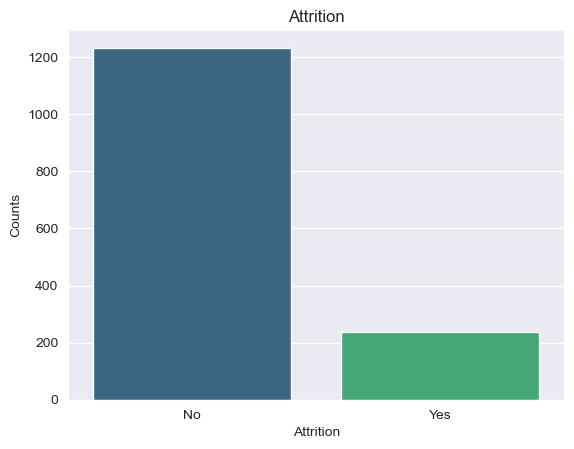

In [40]:
#Table showing us how the data is related
attrition_counts = attrition["Attrition"].value_counts()


sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette="viridis")
plt.title("Attrition")
plt.xlabel("Attrition")
plt.ylabel("Counts")
plt.show()


In [41]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [42]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [43]:
#pass categorical to numerical
attrition["Attrition"] = attrition["Attrition"].map({"Yes": 1, "No": 0})
attrition=pd.get_dummies(attrition, drop_first=True)
attrition.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


In [44]:
#Lineal Correlation
correlation_matrix = attrition.corr()
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

print(attrition_correlation)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

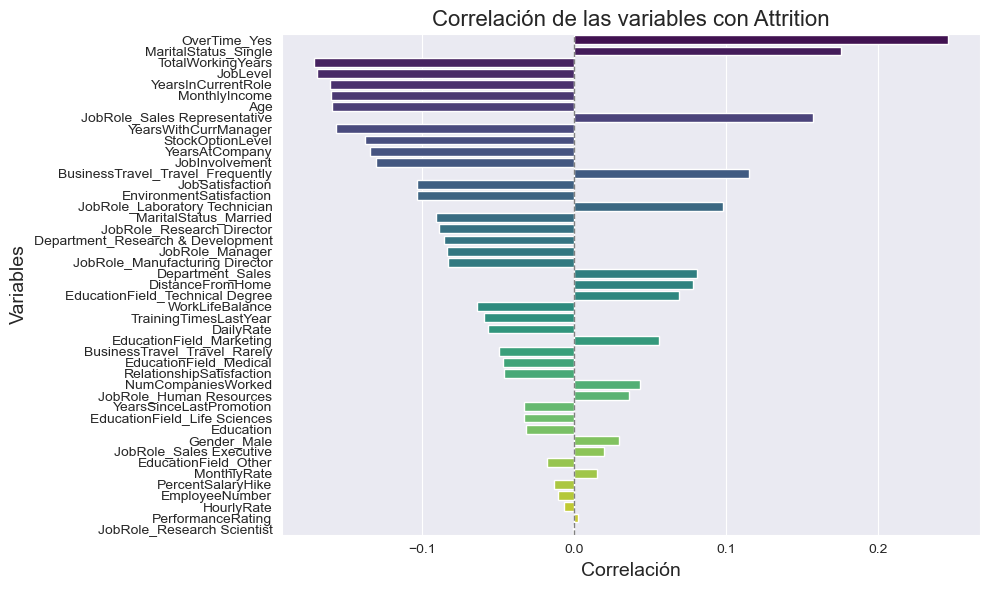

In [45]:
#plot correlation
attrition_correlation = attrition_correlation.drop("Attrition")
# Sort the remaining correlations by their absolute values in descending order
attrition_correlation = attrition_correlation.sort_values(ascending=False, key=abs)

#Create a bar plot to visualize the correlation of each variable with "Attrition"
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_correlation.values, y=attrition_correlation.index, palette="viridis")
plt.title("Correlación de las variables con Attrition", fontsize=16)
plt.xlabel("Correlación", fontsize=14)
plt.ylabel("Variables", fontsize=14)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.tight_layout()
plt.show()

In [46]:
# Define the features (X) by dropping the target column "Attrition"
X = attrition.drop("Attrition", axis=1)
y = attrition["Attrition"]

# plit the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importance values and associate them with feature names
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)
# Display the feature importance
print(feature_importance_df)

# Evaluate the model's performance on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                              Feature  Importance
10                      MonthlyIncome    0.073318
44                       OverTime_Yes    0.059578
0                                 Age    0.053768
11                        MonthlyRate    0.046119
1                           DailyRate    0.044509
17                  TotalWorkingYears    0.044402
4                      EmployeeNumber    0.044059
20                     YearsAtCompany    0.042541
6                          HourlyRate    0.041017
2                    DistanceFromHome    0.040766
12                 NumCompaniesWorked    0.034978
13                  PercentSalaryHike    0.033408
23               YearsWithCurrManager    0.030406
16                   StockOptionLevel    0.030277
9                     JobSatisfaction    0.026697
22            YearsSinceLastPromotion    0.026182
21                 YearsInCurrentRole    0.026047
18              TrainingTimesLastYear    0.025878
8                            JobLevel    0.024145


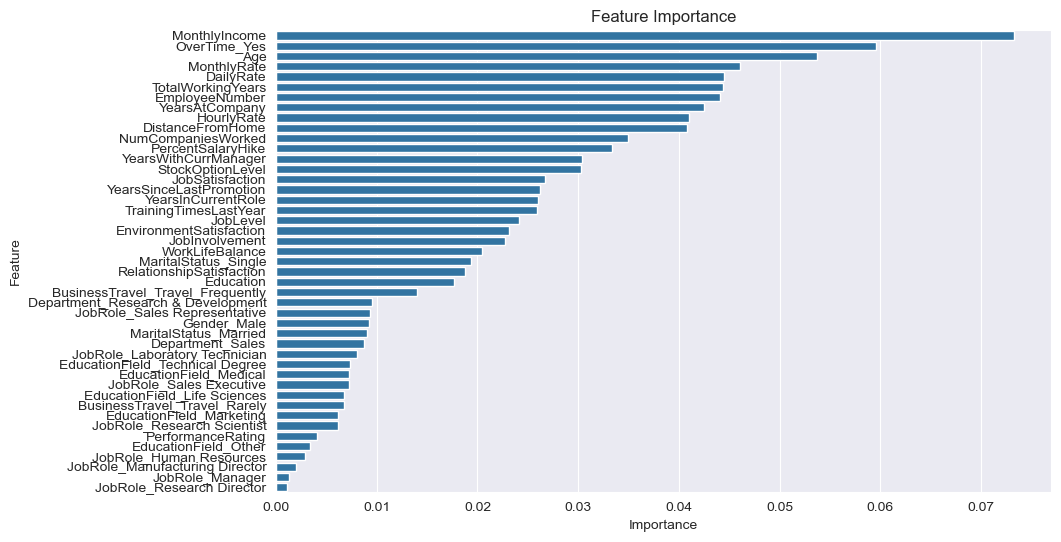

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

In [54]:
#Linean regression model
attrition = attrition.astype({col: 'int' for col in attrition.select_dtypes(include=['bool']).columns})

In [57]:
X = attrition.drop('Attrition', axis=1)
y = attrition['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.8707482993197279


In [58]:

X = attrition.drop('Attrition', axis=1)
y = attrition['Attrition']

# Split the data into training and testing".
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# "Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# F1 SCORE
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# REPORT
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(report)


F1 Score: 0.05

Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294

